<center><h2>Quantum Billiard Ball on a Square Table</h2></center>
<p>
    This program is similar <b>SqBilliardCM</b> which is for a classical billiard ball bouncing around on a square table.
   Here the "ball" is a quantum wavepacket  moving according to the time-dependent Schrödinger equation.

<IPython.core.display.Javascript object>


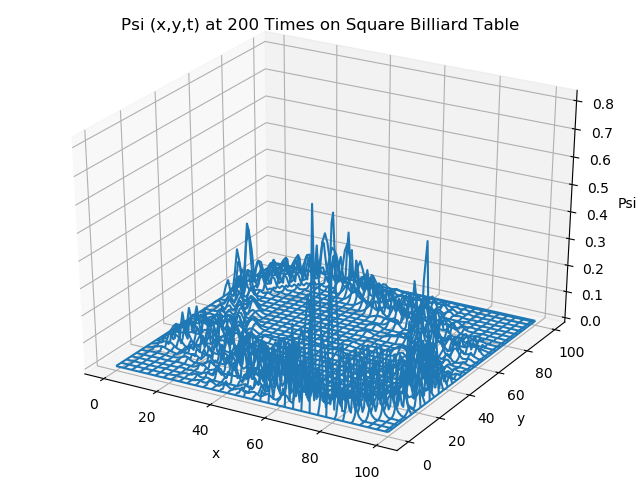

In [2]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

# SqBillardQM.py: Solve t-dependent Schroedinger eq on square table

% matplotlib notebook

import matplotlib as mpl, numpy as np, matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

Nmax = 101; dt = 0.01;  dx = 0.2; dx2 = dx*dx;  fc = dt/dx2
Tmax = 200; Kx = 10.;   Ky = 15.; xin = 50.;    yin = 50.
I = np.zeros((Nmax,Nmax),float);  R = np.zeros((Nmax,Nmax),float)
for i in range(1,Nmax-1):                          # Initial psi 
        for j in range(1,Nmax-1):
          Gauss = np.exp(-.05*(i-yin)**2-.05*(j-xin)**2)
          R[i,j] = Gauss*np.cos(Kx*j + Ky*i)
          I[i,j] = Gauss*np.sin(Kx*j + Ky*i)
for t in range(0,Tmax):                          # Step thru time
    R[1:-1,1:-1] = R[1:-1,1:-1]  - fc*(I[2: ,1:-1] + I[0:-2,1:-1] \
                 -4*I[1:-1,1:-1] + I[1:-1, 2:]    + I[1:-1,0: -2])
    I[1:-1,1:-1] = I[1:-1,1:-1]  + fc*(R[2: ,1:-1] + R[0:-2,1:-1] \
                 -4*R[1:-1,1:-1] + R[1: -1,2: ]    + R[1:-1,0: -2])    
x = y = np.arange(0, Nmax)                     
X, Y = plt.meshgrid(x, y)
Z = (I**2 + R**2)          
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X ,Y ,Z)
ax.set_xlabel('x');  ax.set_ylabel('y');  ax.set_zlabel('Psi')
ax.set_title('Psi (x,y,t) at 200 Times on Square Billiard Table')
plt.show()